In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
!pip install ipywidgets
# Import necessary libraries
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00


In [2]:
transactions = pd.read_csv('/content/Transactions.csv')
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')

In [3]:
merged_data = transactions.merge(customers, on='CustomerID', how='inner')
merged_data = merged_data.merge(products, on='ProductID', how='inner')

merged_data.to_csv('/content/Merged_Data.csv', index=False)
print("Merged data saved to Merged_Data.csv")


Merged data saved to Merged_Data.csv


General info of the data



In [6]:
print("\nDataset Information:")
print(merged_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
 13  PurchaseTime     1000 non-null   object        
dtypes: datetime64[ns](1

In [7]:
print("\nFirst 5 rows of the dataset:")
print(merged_data.head())


First 5 rows of the dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y PurchaseTime  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68

In [8]:
print("\nSummary statistics:")
print(merged_data.describe())


Summary statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  


Check for missing values

In [9]:
print(merged_data.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
PurchaseTime       0
dtype: int64


Add a new column for Purchase Time

In [33]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['PurchaseTime'] = merged_data['TransactionDate'].dt.strftime('%I %p')
merged_data['Hour'] = merged_data['TransactionDate'].dt.hour

Sort Purchase Time in ascending order (1 AM to 12 AM)

In [34]:
time_order = [f"{hour} {'AM' if hour < 12 else 'PM'}" for hour in range(1, 13)]
time_order += [f"{hour} {'PM' if hour < 12 else 'AM'}" for hour in range(1, 13)]
merged_data['PurchaseTime'] = pd.Categorical(merged_data['PurchaseTime'], categories=time_order, ordered=True)


In [35]:
print("\nFirst 5 rows of the dataset:")
print(merged_data.head())


First 5 rows of the dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y PurchaseTime  Hour  
0  ComfortLiving Bluetooth Speaker  Electronics   

In [27]:
# Save the updated merged data with the new column to a CSV file
merged_data.to_csv('/content/Merged_Data_with_PurchaseTime.csv', index=False)
print("Updated merged data with PurchaseTime saved to Merged_Data_with_PurchaseTime.csv")

Updated merged data with PurchaseTime saved to Merged_Data_with_PurchaseTime.csv


# Exploratory Analysis and Visualizations

Number of regions

In [5]:
num_regions = merged_data['Region'].nunique()
print(f"Number of regions: {num_regions}")

Number of regions: 4


Number of categories

In [10]:
num_categories = merged_data['Category'].nunique()
print(f"Number of categories: {num_categories}")

Number of categories: 4


Number of unique items for each category

In [17]:
unique_items_per_category = merged_data.groupby('Category')['ProductID'].nunique()
print("\nNumber of unique items for each category:")
print(unique_items_per_category)


Number of unique items for each category:
Category
Books          26
Clothing       25
Electronics    26
Home Decor     23
Name: ProductID, dtype: int64


# Visualizations

# **1. Track purchasing time vs quantity for each region**

In [36]:
def plot_time_vs_quantity(region):
    region_data = merged_data[merged_data['Region'] == region]
    hourly_quantity = region_data.groupby('Hour')['Quantity'].sum().reindex(range(24), fill_value=0)
    hourly_labels = [f"{hour % 12 or 12} {'AM' if hour < 12 else 'PM'}" for hour in range(24)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=hourly_labels, y=hourly_quantity, marker='o')
    plt.title(f'Purchasing Time vs Quantity for {region}')
    plt.xlabel('Purchase Time')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

regions = merged_data['Region'].unique()
interact(plot_time_vs_quantity, region=Dropdown(options=regions, description='Region:'))


interactive(children=(Dropdown(description='Region:', options=('Europe', 'Asia', 'South America', 'North Ameri…

<function __main__.plot_time_vs_quantity(region)>

# **2. Category vs Quantity curve for each region**

In [37]:
def plot_category_vs_quantity(region):
    region_data = merged_data[merged_data['Region'] == region]
    category_quantity = region_data.groupby('Category')['Quantity'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=category_quantity, x='Category', y='Quantity', marker='o')
    plt.title(f'Category vs Quantity for {region}')
    plt.xlabel('Category')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

interact(plot_category_vs_quantity, region=Dropdown(options=regions, description='Region:'))

interactive(children=(Dropdown(description='Region:', options=('Europe', 'Asia', 'South America', 'North Ameri…

<function __main__.plot_category_vs_quantity(region)>

# **3. Price vs Quantity sold curve for each region**

In [26]:
def plot_quantity_vs_product_name(category):
    category_data = merged_data[merged_data['Category'] == category]
    plt.figure(figsize=(14, 8))
    sns.histplot(data=category_data, y='ProductName', bins=30, kde=False, color='skyblue')
    plt.title(f'Quantity vs Product Name for {category}')
    plt.xlabel('Quantity sold')
    plt.ylabel('Product Name')
    plt.grid(True)
    plt.show()

categories = merged_data['Category'].unique()
interact(plot_quantity_vs_product_name, category=Dropdown(options=categories, description='Category:'))

interactive(children=(Dropdown(description='Category:', options=('Electronics', 'Clothing', 'Books', 'Home Dec…

<function __main__.plot_quantity_vs_product_name(category)>

# **4. Product Name vs **Quantity** (Filtered by Category)**




In [42]:
product_quantity = merged_data.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index()

def plot_product_vs_quantity(category):
    category_data = product_quantity[product_quantity['Category'] == category]

    plt.figure(figsize=(14, 6))
    sns.barplot(data=category_data, x='ProductName', y='Quantity', palette='viridis')
    plt.title(f'Total Quantities Purchased for Products in {category}')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

categories = merged_data['Category'].unique()
interact(plot_product_vs_quantity, category=Dropdown(options=categories, description='Category:'))

interactive(children=(Dropdown(description='Category:', options=('Electronics', 'Clothing', 'Books', 'Home Dec…

<function __main__.plot_product_vs_quantity(category)>

# **5. Signup Date vs. Quantity**

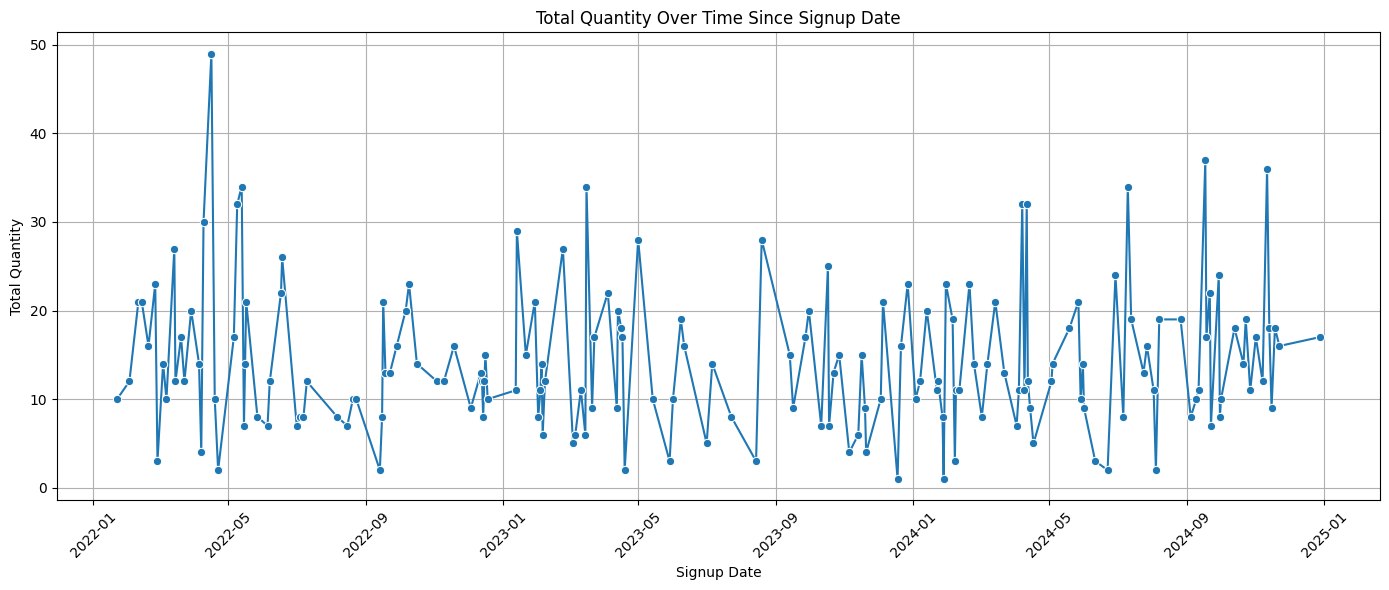

In [41]:
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

signup_quantity = merged_data.groupby('SignupDate')['Quantity'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=signup_quantity, x='SignupDate', y='Quantity', marker='o')
plt.title('Total Quantity Over Time Since Signup Date')
plt.xlabel('Signup Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()